# Memoria Densamente Asociada

__*Una prespectiva bio-inspirada de redes neuronales*__

Junio, 2022

## Memoria asociativa y Reconocimiento de Patrones

El reconocimiento de patrones es una tarea que realizamos constantemente, si nos preguntan por un físico inglés cuyo nombre termina con la letra $n$ es muy posible que recordemos a _Newton_, más no sabemos si es la entrada $127$ de nuestros registros mentales de científicos famosos.

<img src="memorias.png" width=200 height=200 />

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

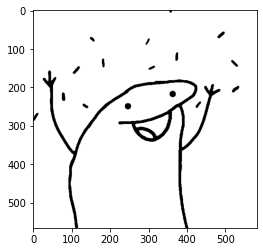

(566, 582)


In [10]:
imgp = cv2.imread('party.png', 0) 
#inverted_img = (255.0 - my_img)  no fue necesaria
final = imgp / 255.0
img_bw = (final > 0.5)*1
plt.imshow(img_bw, cmap='gray')
plt.show()
print(img_bw.shape)

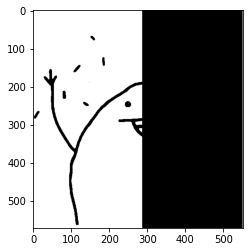

(572, 552)


In [11]:
imgp = cv2.imread('half.png', 0) 
#inverted_img = (255.0 - my_img)  no fue necesaria
final = imgp / 255.0
imgh_bw = (final > 0.5)*1
plt.imshow(imgh_bw, cmap='gray')
plt.show()
print(imgh_bw.shape)

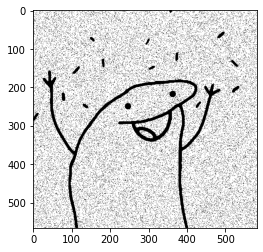

(566, 582)


In [12]:
img_r = img_bw - 0.15*np.random.randn(img_bw.shape[0],img_bw.shape[1])
final_r = img_r / img_r.max()
img_ruido = (final_r > 0.5)*1
plt.imshow(img_ruido, cmap='gray')
plt.show()
print(img_ruido.shape)

El fenómeno de asociación de patrones puede formularse de la siguiente manera. Sean $s_1 ; t_1, s_2 ; t_2, …, s_k ; t_k$ pares de patrones. Si hay un sistema o aparato que genere el patrón $t_i$ cuando se le presente el $s_i$ decimos que el sistema es _asociativo_ o de _memoria de direccionamiento por contenido_ que ha almacenado los patrones $s_1 ; t_1, s_2 ; t_2, …, s_k ; t_k$.

El acto de relacionar un patron $s_i$ con el correspondiente $t_i$ almacenado se denomina como asociación de patrones.

La _memoria asociativa_ es el almacenamiento y recuperación de información por asociación datos de entrada.

Una propiedad de esta asociación es la capacidad que tiene para aceptar un input con ruido y asociarlo correctamente. Sin embargo, hay un límite para esto.

Redes Neuronales de Memoria Asociativa son aquellas que almacenan un conjunto de asociaciones de patrones.

Hoy 2 tipos: auto-asociativas y hetero-asociativas. 

En el caso hetero-asociativo, las redes establecen una correspondencia entre un vector de entrada y un vector de salida de distinta dimensión.

En el caso auto-asociativo, el input y el output tienen la misma dimensión.

La arquitectura puede variar, puede ser _feedforward_ o _recurrente_ (iterativa).

## Redes Neuronales

 Una red neuronal artificial es un modelo matemático inspirado en redes neuronales biológicas. Consiste de un grupo entrelazado de nodos o neuronas artificiales individuales cuya estructura se escoge de acuerdo al problema que se enfrenta.

La estructura y funcionamiento del sistema nervioso central tiene como parte constituyente a la neurona biológica que consiste en un cuerpo celular, el axón, las dendritas y las sinapsis. Estas últimas son las conexiones entre neuronas. El mecanismo sináptico es el que se busca mapear a un algoritmo analítico.

<img src="neuron.png" width=600 height=600 />

Una neurona artificial se conoce también como _perceptrón_ y su forma básica es la siguiente:

\begin{equation}
  y(x_1, \dots, x_n) = f(w_1 x_1 + \dots w_n x_n + b). \\
\end{equation}

Donde cada $x_i$ se toma en cuenta individualmente por medio de un peso aprendido $w_i$.

Esto nos permite construir un mapeo de $(x_1, \dots, x_n) = \bf{x} \in \mathbb{R}^n$ a la variable de salida $y$. La función $f$ se puede definir como una función de salto:

\begin{equation*}
f(s)=\begin{cases}
          0 \quad &\text{if} \, s \leq 0 \\
          1 \quad &\text{if} \, s > 0 \\
     \end{cases}
\end{equation*}

O puede ser una función más general.


El valor $b$ conocido como _bias o sesgo_ permite aplicar la función $f$ a hiperplanos que no pasan por el origen. De esta forma el perceptrón es la composición de una transformación afín seguida de una función de salto que también se denomina como _función de activación_. Esta no necesariamente es una función de salto y se elige según el problema que se esta tratando de resolver.

<img src="perceptron.png" width=300 height=300 />

Usando lo anterior, las redes Feed-forward tienen justo esta forma:

\begin{equation}
  y_t = f({\bf{W}}x_t + b). \\
\end{equation}

Las recurrentes tienen la forma:

\begin{equation}
  y_t = f({\bf{W}}[x_t;y_{t-1}] + b). \\
\end{equation}

en las que incluimos la dependencia del paso anterior $y_{t-1}$

## Redes de Hopfield

Una red de _Hopfield_ es un tipo de red neuronal artificial que busca modelar la forma en cómo usamos la memoria para reconocer patrones. 

Una idea central de la propuesta de Hopfield es modelar el comportamiento neuronal como se modela el comportamiento colectivo en un sistema físico discreto.


Modelo de Ising

<img src="ising.png" width=600 height=600 />

En analogía con el método de Ising:

* Suponemos un arreglo en forma de red en donde cada nodo representa una neurona.
* Una neurona se va a activar según el estado de sus vecinos. 
> Los estados son binarios.
* Asociamos al sistema una energía que debemos minimizar.

* La forma de la energía es:

\begin{align*}
E &= - \frac{1}{2} \sum_{i,j = 1}^{N} y_i w_{ij} y_j - y_i b_i \\
w_{ij} &= \sum_{\mu = 1}^{K} \xi_{i}^{\mu} \xi_{j}^{\mu} \\
\end{align*}

el $\frac{1}{2}$ es porque la matriz es simétrica.


* Cada $\xi_{i}^{\mu}$ es un vector de tamaño N, es decir $i = 1, \cdots, N$.

* Cada uno representa una memoria o patrón a memorizar, tenemos que $\mu = 1, \cdots, K$.

* La notación usada para la matriz de pesos es $W \equiv T$

## Algoritmo de Hopfield

> Asociación de patrones (análogo a una etapa de entrenamiento): Ocurre de manera colectiva, calculamos todos los pesos $w_{ij}$ en un solo paso.

> Asociación de memoria (dinámica de la red neuronal): Dado un input $\xi$, aplicamos $W$ de tal manera que la energía se minimiza.


* Se tiene una dinámica en la que el input es constante.
* La forma es:

\begin{equation}
  y_t = f({\bf{W}}y_{t-1} + b). \\
\end{equation}

* La $i$-ésima neurona tiene una salida dada por:

\begin{equation}
 x_i = \sum_{j \neq i} w_{ij} y_j + b\\
\end{equation}

\begin{equation}
  y_i = sign(x_i) \\
\end{equation}

* Los pesos sinápticos cumplen que son simétricos $w_{ij} = w_{ji}$ y no consideramos auto-interacción $w_{ii}=0$.

Podemos observar que:

* Dado un patron o estado inicial arbitrario, vamos actualizando cada entrada del arreglo bajo este algoritmo.
* Si $sign(x_i)$ es $+1$ corresponde a una activación de la neurona.
* Hay un momento en el que ya no van a cambiar las entradas, ese ultimo estado en el patron asociado en la memoria.

Los patrones iniciales en la memoria son puntos fijos de la dinámica de la red.

* Si ahora vemos el cambio en energía:

\begin{align*}
E(y) - E(y') &= - \frac{1}{2} \sum_{i,j = 1}^{N} y_i w_{ij} y_j - y_i b_i + \frac{1}{2} \sum_{i,j = 1}^{N} y'_i w_{ij} y'_j + y'_i b_i 
\end{align*}

Vamos a fijarnos en el caso $i=k$, es decir en un estado en el que solo la entrada $k$ se actualiza, pero el resto del vector ya deja de cambiar, por lo que la suma sobre $i$ da cero excepto en $i=k$:

\begin{align*}
E(y) - E(y') &= \sum_{j = 1}^{N} y_k w_{kj} y_j - y_k b_k + \sum_{j = 1}^{N} y'_k w_{kj} y'_j + y'_k b_k \\
 &= - (y_k - y'_k) \sum_{j = 1}^{N} w_{kj} y_j + b_k (y_k - y'_k)  \\
\end{align*}

Por lo que,

\begin{align*}
E(y) - E(y') &= - (y_k - y'_k) (\sum_{j = 1}^{N} w_{kj} y_j + b_k)  \\
& = - (y_k - y'_k) e_k
\end{align*}



Observamos que estamos en el caso en sí hubo activación:

* $y'_k = sign(x_k)$ es la entrada que sí cambió, por lo que es de signo diferente a $y_k$.
* Por ejemplo, si $y_k = 1$, entonces $y'_k = -1 = sign(e_k)$ y $(y_k - y'_k) = 2$.
* Entonces $e_k$ y $(y_k - y'_k)$ son de signos contrarios. 

Esto implica que $E(y) - E(y') > 0$.

> Cada vez que se actualiza el estado la energía decrece ya que $E(y) > E(y')$.

> Como hay un número finito de estados, hay un momento en el que llegamos a un punto estable.

<img src="hopfield.png" width=600 height=600 />

# Ejemplo


In [2]:
num_p = 4   # Numero de patrones a aprender

# Para poder visualizar los patrones:
# cada arreglo podria verse como una matriz de 5 x 5
ancho = 5 
alto = 5

# Veces que vamos a actualizar el resultado de usar W
max_iteraciones = 10

In [3]:
# letra oscura
U =  [-1,1,1,1,-1,-1,1,1,1,-1,
      -1,1,1,1,-1,
      -1,-1,1,-1,-1,
      1,-1,-1,-1,1]

Ene = [1,1,1,1,1, -1,-1,1,1,-1,
    -1,1,-1,1,-1,
    -1,1,1,-1,-1,
    -1,1,1,1,-1]

A = [1,1,-1,1,1, 1,-1,1,-1,1,
    1,-1,1,-1,1,
    -1,-1,-1,-1,-1,
    -1,1,1,1,-1]

M = [-1,1,1,1,-1,  -1,-1,1,-1,-1,
     -1,1,-1,1,-1,
     -1,1,1,1,-1,
     -1,1,1,1,-1]

In [4]:
u_w = [-1*x for x in U]
n_w = [-1*x for x in Ene]
a_w = [-1*x for x in A]
m_w = [-1*x for x in M]

In [5]:
#letras = np.array([u_w,n_w,a_w,m_w],dtype=float)
letras = np.array([U,Ene,A,M],dtype=float)

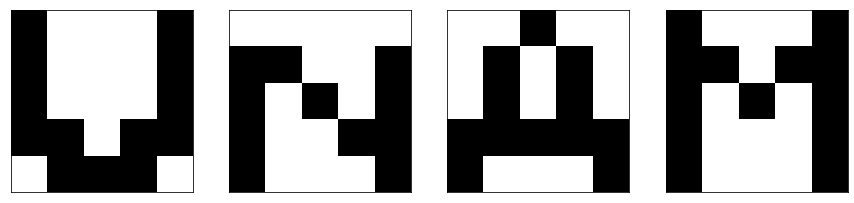

In [6]:
# Show the patterns
fig, ax = plt.subplots(1, num_p, figsize=(15, 10))

for i in range(num_p):
    ax[i].matshow(letras[i].reshape((alto, ancho)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

# Asociación de patrones

In [7]:
W = np.zeros((ancho * alto, ancho * alto))

In [34]:
b = np.sum(letras, axis=0) / num_p
b

array([ 0. ,  1. ,  0.5,  1. ,  0. , -0.5, -0.5,  1. ,  0. , -0.5, -0.5,
        0.5,  0. ,  0.5, -0.5, -1. ,  0. ,  0.5, -0.5, -1. , -0.5,  0.5,
        0.5,  0.5, -0.5])

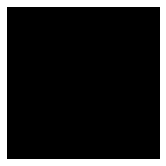

In [9]:
plt.subplot(121); plt.imshow(W, cmap='gray'); plt.axis('off');

In [10]:
len(letras[2])

25

## Aprendizaje de Hebb

* La regla de aprendizaje más simple

* 2 neuronas que simultáneamente se activan están relacionadas y acopladas.

La regla es actualizar cada $w_{ij}$ sumando el termino de interacción:

\begin{align*}
\Delta w_{ij} &= \gamma x_i x_j  \\
\end{align*}

Como tenemos que cada $x_i$ es 1 o -1, en la diagonal siempre tenemos el valor de $\gamma$.

Vamos a tomar $\gamma = 1$.

* La regla es: $w_{ij} + x^{\mu}_{i} x^{\mu}_{j} \to w_{ij}$

* Para $\mu = 1$ tendremos $W_1 = x^{T}_1 x_1 - I$

donde $I$ es la identidad, esto apra satisfacer que la diagonal es cero.

Para $\mu > 1$, tenemos:

\begin{align}
W &= x^{T}_1 x_1 - I + x^{T}_2 x_2 - I + \cdots + x^{T}_K x_K - I\\
&= x^{T}_1 x_1 + x^{T}_2 x_2 + \cdots + x^{T}_K x_K - KI\\
&= X^{T} X - KI\\
\end{align}

Redefinimos $W \equiv W / K$

In [87]:
N = np.shape(letras)[1] # Dimension del arreglo
#n = num_p
W = ( letras.T @ letras ) / num_p - np.eye(N)

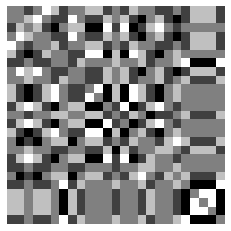

In [88]:
plt.subplot(); plt.imshow(W, cmap='gray'); plt.axis('off');

In [21]:
print(W.shape)
print(W[1,2])

(25, 25)
0.5


## Asociación de memoria

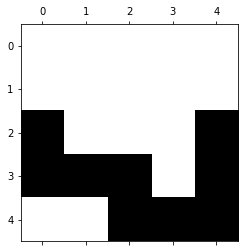

In [55]:
# Letra con información faltante
no_U = np.array(  [1,1,1,1,1,1,1,1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,-1],#  [1,-1,-1,-1,-1,1,1,1,1,1,-1,-1,1,1,1,-1,1,1,1,1,1,1,-1,-1,-1.],
       dtype=float)
#W = np.zeros((ancho * alto, ancho * alto))
fig, ax = plt.subplots()
ax.matshow(no_U.reshape((alto, ancho)), cmap='gray')

Para medir el error cometido al recuperar la memoria usaremos la distancia de Hemming, sumamos una unidad si dos vectores difieren en una entrada dada, por ejemplo (1,1) y (200,1) estan a distancia 1 con esta métrica.

In [82]:
PR = np.zeros((ancho * alto)) # vector con los valores del potencial
Mem = no_U # hacemos una copia del original que vamos a actualizar
max_iteraciones = 10
hamming_d = np.zeros((max_iteraciones,num_p)) #Distancia de Hamming con cada memoria almacenada

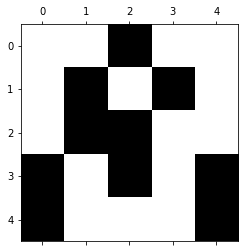

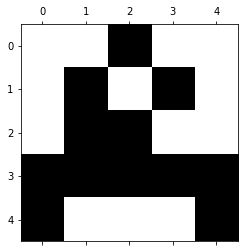

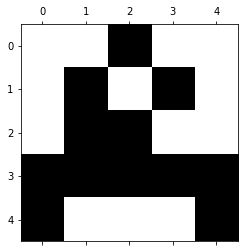

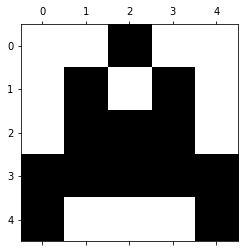

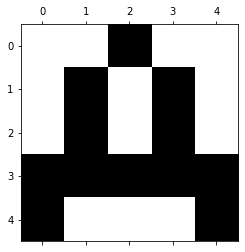

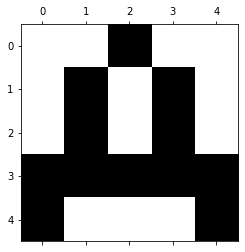

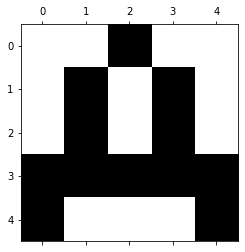

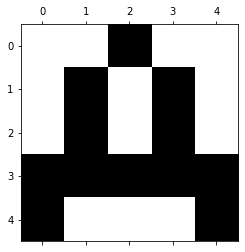

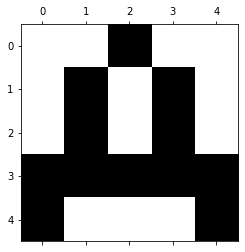

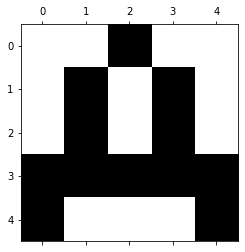

In [83]:
for iteracion in range(max_iteraciones):
    for i in range(ancho * alto):
        i = np.random.randint(ancho * alto)
        PR[i] = 0
        for j in range(ancho * alto):
            PR[i] += W[i, j]*Mem[j] - b[j]
        Mem = np.where(PR<0, 0, 1)
    for k in range(num_p):
        hamming_d[iteracion, k] = ((letras - Mem)[k]!= 0).sum()
    fig, ax = plt.subplots()
    ax.matshow(Mem.reshape((alto, ancho)), cmap='gray')

In [84]:
hamming_d

array([[21., 15., 13., 16.],
       [21., 16., 13., 18.],
       [21., 16., 13., 18.],
       [22., 17., 13., 19.],
       [21., 17., 12., 19.],
       [21., 17., 12., 19.],
       [21., 17., 12., 19.],
       [21., 17., 12., 19.],
       [21., 17., 12., 19.],
       [21., 17., 12., 19.]])

In [85]:
PR

array([ 4. ,  1. , -4.5,  1. ,  4. ,  2.5, -5.5,  1. , -4. ,  2.5,  2.5,
       -4.5,  0. , -4.5,  2.5, -3. , -2. , -4.5, -3.5, -3. , -5.5,  3.5,
        3.5,  3.5, -5.5])

# Memoria Densamente Asociada 

Redes de Hopfield Modernas

K vectores que queremos memorizar denotados por $\xi_{i}^{\mu}$.

La ecuaciones que definen una red de Hopfield son: 
\begin{align*}
E &= - \sum_{i,j = 1}^{N} \sigma_i T_{ij} \sigma_j \\
T_{ij} &= \sum_{\mu = 1}^{K} \xi_{i}^{\mu} \xi_{j}^{\mu} \\
\end{align*}

\begin{align*}
E &= - \sum_{i,j = 1}^{N} \sigma_i \left( \sum_{\mu = 1}^{K} \xi_{i}^{\mu} \xi_{j}^{\mu} \right) \sigma_j \\
&= - \sum_{i,j = 1}^{N} \left( \sum_{\mu = 1}^{K}  \sigma_i \xi_{i}^{\mu} \xi_{j}^{\mu} \sigma_j \right) \\
&= - \sum_{\mu = 1}^{K} \left( \sum_{i,j = 1}^{N}  \sigma_i \xi_{i}^{\mu} \xi_{j}^{\mu} \sigma_j \right) \\
&= - \sum_{\mu = 1}^{K}  \sum_{i = 1}^{N} \left( \xi_{i}^{\mu} \sigma_i \right)^{2}  \\
&= - \sum_{\mu = 1}^{K}  f \left( \xi_{i}^{\mu} \sigma_i \right)  \\
\end{align*}

donde $f$ es una funcion cuadrática (suma sobre $i$ incluída).

Una Memoria Densamente Asociada (DAM) asume la forma general:

\begin{align*}
E = - \sum_{\mu = 1}^{K}  F \left( \xi_{i}^{\mu} \sigma_i \right)  \\
\end{align*}

# Bibliografía DAMs

Hopfield J. J., _Neural networks and physical systems with emergent collective computational abilities_, _Proc. Natl. Acad. Sci. USA_, __79__, 1982, pp. 2554-2558.

Krotov D., Hopfield J. J., _Dense associative memory for pattern recognition, _Advances in neural information processing systems_, __29__, 2016, pp.1172-1180.

Krotov D., Hopfield J. J., _Dense associative memory is robust for adversarial inputs_, _Neural Computation_, __30__,2018, pp.3151-3167.

# Bibliografía General

Goodfellow I., et al., _Deep Learning_, MIT Press, 2016.

Rojas R., _Neural Networks: A Systematic Introduction_, Springer, 1996.

Bear M., et al., _Neuroscience. Exploring the Brain_, Wolters Kluwer, 2015.

Roy S., et al., _Introduction to Soft Computing. Neuro-fuzzy and Genetic Algorithms_, Pearson India, 2013.

Gabbiani F., et al., _Mathematics for Neuroscientists_, Academic Press, 2010.